### `themachinethatgoesping` tutorial series
# Tutorial 1: Introduction

In this tutorial, we use `themachinethatgoesping` to access the coordinates (latitude/longitude) of all pings in a given dataset. 

This short sequence illustrates a few core objects of the `themachinethatgoesping`, and how to use them to load and access data.

`themachinethatgoesping` concepts covered:
- finding .all/.wcd files
- data loading
- "File Handler" object
- "Ping Container" object
- "Ping" object
- "Ping Location" object


## Summary

Found 18 files
indexing files ⠐ 100% :00s<00m:00s] [..6328335172073169.all (1/18)]                               
indexing files ⠠ 100% :00s<00m:00s] [..3858047591065953.wcd (18/18)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 1509 datagrams in 18 files (26MB)]                                          
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


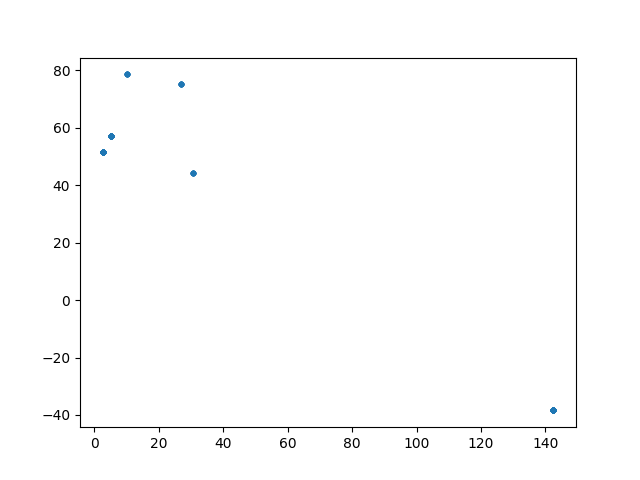

In [1]:
%matplotlib widget
import os

from matplotlib import pyplot as plt
from themachinethatgoesping.echosounders import index_functions
from themachinethatgoesping.echosounders import kongsbergall

folders = []
folders.append("../unittest_data")

# list raw data files
files = index_functions.find_files(folders, [".all","wcd"])
files.sort()

# load files' data
fh = kongsbergall.KongsbergAllFileHandler(files)

# get pings' coordinates
lat, lon = [], []
for ping in fh.get_pings():
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')

## Step-by-step
### 1. List raw data files

In [2]:
# define a list of folder(s) to search for raw data files
# notes: 
#   - subdirectories will be searched as well
#   - you can add multiple folders by appending them to the list
#   - pair of files (e.g. .all and .wcd) don't have to be in the same folder
folders = []
folders.append("../unittest_data")

# find all Kongsberg files in the list of folders
from themachinethatgoesping.echosounders import index_functions
files = index_functions.find_files(folders, [".all","wcd"])

Found 18 files


In [3]:
# show files found
print(f"The output is a {type(files)} object with {len(files)} elements:")
files.sort()
for i, file in enumerate(files):
    print(f"({i}/{len(files)}) {file}")

The output is a <class 'list'> object with 18 elements:
(0/18) ../unittest_data/kongsberg/a/c/8136328335172073169.all
(1/18) ../unittest_data/kongsberg/a/c/8136328335172073169.wcd
(2/18) ../unittest_data/kongsberg/a/f/ALL/7940434004712898291.all
(3/18) ../unittest_data/kongsberg/a/f/WCD/7940434004712898291.wcd
(4/18) ../unittest_data/kongsberg/a/y/-6430362035178526648.all
(5/18) ../unittest_data/kongsberg/a/y/-6430362035178526648.wcd
(6/18) ../unittest_data/kongsberg/e/-7731314027977193437.all
(7/18) ../unittest_data/kongsberg/e/76411649188412698.all
(8/18) ../unittest_data/kongsberg/g/-2784638328592650682.all
(9/18) ../unittest_data/kongsberg/g/-2784638328592650682.wcd
(10/18) ../unittest_data/kongsberg/he/-3740211369500593285.all
(11/18) ../unittest_data/kongsberg/he/-3740211369500593285.wcd
(12/18) ../unittest_data/kongsberg/simon/-4564033532462129271.all
(13/18) ../unittest_data/kongsberg/simon/-4564033532462129271.wcd
(14/18) ../unittest_data/kongsberg/turbeams/-786738933486407358

### 2. Load files' data

In [4]:
# load the data with:
from themachinethatgoesping.echosounders import kongsbergall
fh = kongsbergall.KongsbergAllFileHandler(files)
print("\n")

# the output is a "File Handler" object. 
print(f"A File Handler is a {type(fh)} object.\n")

# a File Handler manages the entire dataset.

# print a summary of the File Handler's contents
print(fh)

# notes:
#   - it is initalized with the list of files
#   - the cache file paths are optional but recommended
#   - File pairs will be grouped together at this stage

indexing files ⠐ 100% :00s<00m:00s] [..6328335172073169.all (1/18)]                               
indexing files ⠠ 100% :00s<00m:00s] [..3858047591065953.wcd (18/18)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 1509 datagrams in 18 files (26MB)]                                          
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


A File Handler is a <class 'themachinethatgoesping.echosounders_cppy.kongsbergall.KongsbergAllFileHandler'> object.

KongsbergAllFileHandler
#######################
-
File infos 
-------------               
- Number of loaded .all files: : 10       
- Number of loaded .wcd files: : 8        
- Total file size: :             26.58 MB 

 Detected datagrams 
^^^^^^^^^^^^^^^^^^^^ 
- timestamp_first:  21/08/2012 17:09:42.36 
- timestamp_last:   26/07/2024 15:02:52.40 
- Total:            1509                   
- Datagrams [0x30]: 4                      [PUIDOutput]
- Datag

### 3. Accessing data

In [5]:
# the pings data are obtained from the File Handler with:
pc = fh.get_pings()

# the output is a "Ping Container" object
print(f"A Ping Container is a {type(pc)} object.\n")

# print a summary of the Ping Container's contents
print(pc)

A Ping Container is a <class 'themachinethatgoesping.echosounders_cppy.kongsbergall.filedatacontainers.KongsbergAllPingContainer'> object.

PingContainer
#############
-
Time info 
------------            
- Start time: 21/08/2012 17:09:42.36 
- End time:   21/04/2023 17:48:17.14 
- Sorted:     ascending              

 Contained pings 
----------------- 
- Total:    174 
- TRX-102:  66  
- TRX-2004: 14  
- TRX-2031: 14  
- TRX-2086: 16  
- TRX-210:  10  
- TRX-2106: 16  
- TRX-213:  17  
- TRX-221:  10  
- TRX-233:  11  


In [6]:
# access pings in a Ping Container by indexing
examplePing = pc[42]

# the output is a "Ping" object
print(f"A Ping is a {type(examplePing)} object.\n")

# print a summary of the Ping's contents
print(examplePing)

A Ping is a <class 'themachinethatgoesping.echosounders_cppy.kongsbergall.filetypes.KongsbergAllPing'> object.

KongsbergAllPing
################
-
Ping infos 
-------------                                                                                                                                                                                                                                                                                                                                                                                                               
- Channel id:             TRX-102                                                                                                                                                                                                                                                                                                                                                                                                         


In [7]:
# a Ping has 3 types of information: base, bottom, and water-column.
# base information includes location
examplePingLocation = examplePing.get_geolocation()

# the output is a "Ping Location" object
print(f"A Ping Location is a {type(examplePingLocation)} object.\n")

# print a summary of the Ping Location's contents
print(examplePingLocation)

A Ping Location is a <class 'themachinethatgoesping.navigation.datastructures.GeolocationLatLon'> object.

GeolocationLatLon (struct)
##########################
- latitude:  38°24'4.2"S   [ddd°mm',ss.s''N/S]
- longitude: 142°29'1.7"E  [ddd°mm',ss.s''E/W]
- z:         0.600         [positive downwards, m]
- yaw:       13.628        [90 ° at east]
- pitch:     0.504         [° positive bow up]
- roll:      0.158         [° positive port up]


In [8]:
# get the latitude and longitude of the ping from the Ping Location
lat, long = examplePingLocation.latitude, examplePingLocation.longitude
print(f"Example ping location - Latitude: {lat}, Longitude: {long}")

Example ping location - Latitude: -38.40116296430116, Longitude: 142.48379345259943


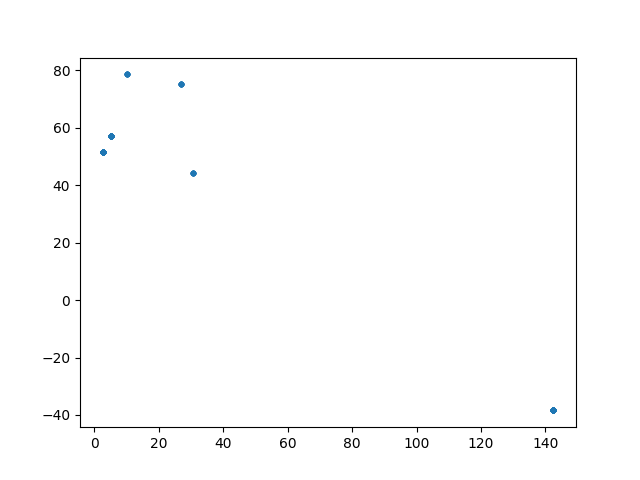

In [9]:
# get pings' coordinates of all pings
lat, lon = [], []
for ping in fh.get_pings():
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')